# Precession Testing & Examples

### Import Libraries and Packages

In [1]:
%pip install susie==1.2.2 -q


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
# Importing from src imports directly from source code
from src.susie.timing_data import TimingData
from src.susie.ephemeris import Ephemeris

import matplotlib.pyplot as plt

### Helper Functions

In [3]:
def anomalistic_period(P, dwdE):
    result = P/(1 - (1/(2*np.pi))*dwdE)
    return result
    
def pericenter(w0, dwdE, E):
    result = w0 + dwdE*E
    return result

def generate_synthetic_precession_data(E, T0, P, e, dwdE, w0, tra_or_occ):
    result = []
    for i, t_type in enumerate(tra_or_occ):
        if t_type == "tra":
            # transit data
            result.append(T0 + E[i]*P - ((e*anomalistic_period(P, dwdE))/np.pi)*np.cos(pericenter(w0, dwdE, E[i])))
        elif t_type == "occ":
            # occultation data
            result.append(T0 + anomalistic_period(P, dwdE)/2 + E[i]*P + ((e*anomalistic_period(P, dwdE))/np.pi)*np.cos(pericenter(w0, dwdE, E[i])))
    return np.array(result)

### Importing the Data

In [4]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/main/example_data/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["transit_time"])
mid_time_errs = np.array(data["sigma_transit_time"])

### Ugh

In [5]:
# def _anomalistic_period(P, dwdE):
#     """Calculates the anomalistic period given a period and a change in pericenter with respect to epoch.

#     Uses the equation:
#     P / (1 - (1/(2*pi)) * dwdE)

#     Parameters
#     ----------
#     P: float
#         The exoplanet sideral orbital period.
#     dwdE: float
#         Change in pericenter with respect to epoch.

#     Returns
#     -------
#         A float of the calculated starting anomalistic period.
#     """
#     result = P/(1 - (1/(2*np.pi))*dwdE)
#     return result

# def _pericenter(w0, dwdE, E):
#     """Calculates the pericenter given a list of epochs, an intial pericenter value, and a change in pericenter with respect to epoch.

#     Uses the equation:
#     w0 + dwdE * E

#     Parameters
#     ----------
#     E: numpy.ndarray[int]
#         The epochs.
#     dwdE: float
#         Change in pericenter with respect to epoch.
#     w0: int
#         The intial pericenter.

#     Returns
#     -------
#         A numpy.ndarray[float] of the calculated pericenter as a function of epochs.
#     """
#     result = w0 + dwdE*E
#     return result

# def precession_fit(E, T0, P, dwdE, w0, e, tra_or_occ):
#     """Calculates a precession function with given data.

#     Uses the equation 
#         -  conjunction time + (epochs * period) - ((eccentricity * anomalistic period) / pi) * cos(pericenter) for transit observations
#         -  conjunction time + (anomalistic period / 2) + epochs * period + ((eccentricity * anomalistic period) / pi) * cos(pericenter) for occultation observations as a precession function for the LMfit Model.
    
#     Parameters
#     ----------
#         e: float
#             The eccentricity.
#         E: numpy.ndarray[int]
#             The epochs.
#         dwdE: float
#             Change in pericenter with respect to epoch.
#         P: float
#             The exoplanet sideral orbital period.
#         T0: float
#             The initial mid-time, also known as conjunction time.
#         tra_or_occ: numpy.ndarray[str]
#             Indicates if the data is from a transit or occultation.
#         w0: int
#             The intial pericenter.
    
#     Returns
#     -------
#         result: numpy.ndarray[float]
#             A precession function to be used with the LMfit Model, returned as:
#             :math:`T0 + E*P - \\frac{e * \\text{self.anomalistic_period}(P,dwdE)}{\\pi} * \\cos(\\text{self.pericenter}(w0, dwdE, E))`
#             :math:`T0 + \\frac{\\text{self.anomalistic_period}(P,dwdE)}{2} + E*P + \\frac{e * \\text{self.anomalistic_period}(P,dwdE)}{\\pi} * \\cos(\\text{self.pericenter}(w0, dwdE, E))`
#     """
#     # anomalistic_period = self._anomalistic_period(P, dwdE)
#     # pericenter = self._pericenter(w0, dwdE, E)
#     result = np.zeros(len(E))
#     for i, t_type in enumerate(tra_or_occ):
#         if t_type == 0:
#             # transit data
#             result[i] = T0 + E[i]*P - ((e*self._anomalistic_period(P, dwdE))/np.pi)*np.cos(self._pericenter(w0, dwdE, E[i]))
#         elif t_type == 1:
#             # occultation data
#             result[i] = T0 + self._anomalistic_period(P, dwdE)/2 + E[i]*P + ((e*self._anomalistic_period(P, dwdE))/np.pi)*np.cos(self._pericenter(w0, dwdE, E[i]))
#     return result

# def fit_model(self, x, y, yerr, tra_or_occ):
#     """Fits a precession model to ephemeris data.

#     Compares the model ephemeris data to the precession fit calculated with precession_fit method. Then minimizes 
#     the difference between the two sets of data. The LMfit Model then returns the parameters of the precession
#     function corresponding to period, conjunction time, pericenter change by epoch, eccentricity, pericenter, and their respective errors. 
#     These parameters are returned in a dictionary to the user.

#     Parameters
#     ----------
#         x: numpy.ndarray[int]
#             The epoch data as recieved from the TimingData object.
#         y: numpy.ndarray[float]
#             The mid-time data as recieved from the TimingData object.
#         yerr: numpy.ndarray[float]
#             The mid-time error data as recieved from the TimingData object.
#         tra_or_occ: numpy.ndarray[str]
#             Indicates if each point of data is taken from a transit or an occultation.

#     Returns
#     ------- 
#     return_data: dict
#         A dictionary of parameters from the fit model ephemeris. 
#         Example:
#             {
#                 'period': Estimated orbital period of the exoplanet (in units of days),
#                 'period_err': Uncertainty associated with orbital period (in units of days),
#                 'conjunction_time': Time of conjunction of exoplanet transit or occultation,
#                 'conjunction_time_err': Uncertainty associated with conjunction_time,
#                 'pericenter_change_by_epoch': The exoplanet pericenter change with respect to epoch,
#                 'pericenter_change_by_epoch_err': The uncertainties associated with pericenter_change_by_epoch,
#                 'eccentricity': The exoplanet pericenter,
#                 'eccentricity_err': The uncertainties associated with eccentricity,
#                 'pericenter': The exoplanet inital pericenter value,
#                 'pericenter_err': The uncertainties associated with pericenter.
#             }
#     """
#     # w0 can be bound between 0 and 2pi
#     # STARTING VAL OF dwdE CANNOT BE 0, WILL RESULT IN NAN VALUES FOR THE MODEL
#     tra_or_occ_enum = [0 if i == 'tra' else 1 for i in tra_or_occ]
#     model = Model(self.precession_fit, independent_vars=['E', 'tra_or_occ'])
#     params = model.make_params(T0=0.0, P=1.091423, dwdE=dict(value=0.000984, max=0.001, min=-0.001), e=dict(value=0.00310, min=0, max=1), w0=dict(value=2.62), tra_or_occ=tra_or_occ_enum)
#     result = model.fit(y, params, weights=1.0/yerr, E=x, tra_or_occ=tra_or_occ_enum)
#     return_data = {
#         'period': result.params['P'].value,
#         'period_err': result.params['P'].stderr,
#         'conjunction_time': result.params['T0'].value,
#         'conjunction_time_err': result.params['T0'].stderr,
#         'eccentricity': result.params['e'].value,
#         'eccentricity_err': result.params['e'].stderr,
#         'pericenter': result.params['w0'].value,
#         'pericenter_err': result.params['w0'].stderr,
#         'pericenter_change_by_epoch': result.params['dwdE'].value,
#         'pericenter_change_by_epoch_err': result.params['dwdE'].stderr
#     }
#     return(return_data)

### Creating the TimingData and Ephemeris objects

In [6]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale='tdb')
ephemeris_obj1 = Ephemeris(timing_obj1)

#### Linear Model

In [7]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

# for key, value in linear_model_data.items():
#     print(f"{key}: {value}\n")

#### Quadratic Model

In [8]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

# for key, value in quadratic_model_data.items():
#     print(f"{key}: {value}\n")

#### Precession Model

In [9]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
precession_model_data = ephemeris_obj1.get_model_ephemeris('precession')

# for key, value in precession_model_data.items():
#     print(f"{key}: {value}\n")

[-0.008491504554967833, -0.00656393328631566, -0.006041566417025024, -0.007357543045600323, -0.007505176621179999, -0.0069624573195596895, -0.0066789070974664355, -0.005970031542346987, -0.006555298107969065, -0.007633167856965883, -0.005719026137285255, -0.007245180131121742, -0.006104588173684533, -0.0064739374838609365, -0.005680920173745108, -0.006670744679013296, -0.0064383781552805885, -0.006822460811804376, -0.00577186907412397, -0.007038023416384931, -0.007187727564996749, -0.007014709853592649, -0.006384709713074699, -0.006491692271083593, -0.006826071074783613, -0.005720154027358149, -0.005958674612429604, -0.005984532763818606, -0.006343349393432618, -0.005662757679147035, -0.0059915745459875325, -0.005860923774321236, -0.005593648169337939, -0.005667730793788905, -0.0056671391349709666, -0.0055559559111770795, -0.0053688551009258845, -0.004165009261839714, -0.006009979580767322, -0.0059882044521373246, -0.005497908849747546, -0.006065778906133801, -0.007105482846725408, -0.

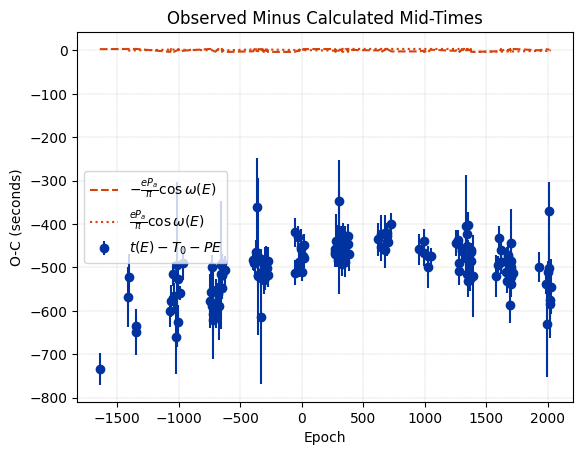

In [10]:
ephemeris_obj1.plot_oc_plot("precession")
plt.show()

[-0.001880988027778585, -0.00011476351755845826, 0.00040482749363945914, -0.0009510520967523917, -0.0011014615306521591, -0.0007495824809211626, -0.0004701960460806731, 0.0002282700406794902, -0.0003625482413553982, -0.0014546442635037238, 0.00045463970423043065, -0.0010760250590919895, 6.387293365150981e-05, -0.0003179677385105606, 0.00045978235152688285, -0.000682714355320968, -0.00045312368979466555, -0.0008441459918913097, 0.0002057517813227605, -0.0010649133306515068, -0.0012149644614964927, -0.0010572139701707783, -0.0004272138296528283, -0.0005494636078537951, -0.000890435074893503, 0.00020854232707279152, -3.171316939187818e-05, -6.242907261366781e-05, -0.00042263363138772547, 0.00025726411843152164, -7.294067756902223e-05, 4.5218732225293934e-05, 0.0001514945609528695, 7.047229104273356e-05, 7.036998528064942e-05, 0.0001801652799713338, 0.00035893851560331314, 0.0015582735850898644, -0.0002925954325405655, -0.00027290219753695055, 0.0002170464225628166, -0.000365049907145476, 

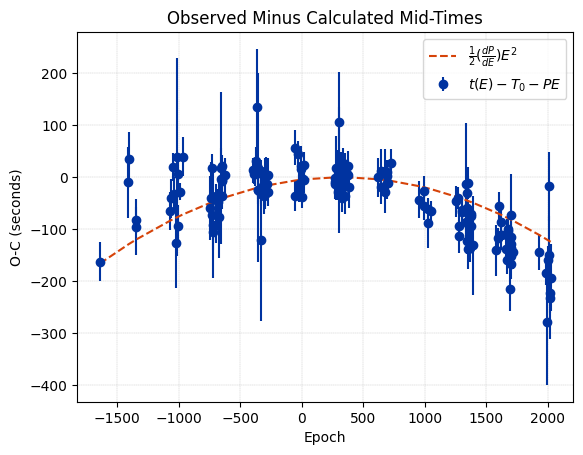

In [11]:
ephemeris_obj1.plot_oc_plot("quadratic")
plt.show()

In [12]:
subtracted_model_times_1 = ephemeris_obj1._subtract_linear_parameters(precession_model_data["model_data"], precession_model_data["conjunction_time"], precession_model_data["period"], ephemeris_obj1.timing_data.epochs)

[-5.227596830081893e-06, -0.545610744691885, -0.5456158682186469, -3.476644860711531e-05, -2.9748337965429528e-05, 3.625022077358153e-05, -2.896449450418004e-05, 4.0878488107409794e-05, 3.8094122601251e-05, -0.5456528883219107, -0.5456047975981164, 2.016087137235445e-05, -3.452239593570994e-05, 3.983320311817806e-06, 3.4664208669710206e-05, -1.8345247099205153e-05, -1.0652843911884702e-05, -9.743977557263861e-06, 3.917866615665844e-05, -0.5456112498421817, -2.454938930895878e-05, 4.022256189273321e-05, 4.022256189273321e-05, -1.1294614523649216e-05, -0.545604874386072, -0.5456770091493581, -3.015682750628912e-05, -1.5502446899517963e-05, 1.1614479149102408e-05, 3.974953733631992e-05, -4.051642645208631e-05, 2.93431954787593e-05, 4.068902865128621e-05, -3.762133462714701e-05, -1.7915211287800048e-05, 2.152450929315819e-05, 3.748129228142716e-05, -0.545604501517289, -1.381098968522565e-05, -3.597519446429942e-05, -0.5456091805142478, -4.089205214086178e-05, -0.545604263536859, -1.3855452

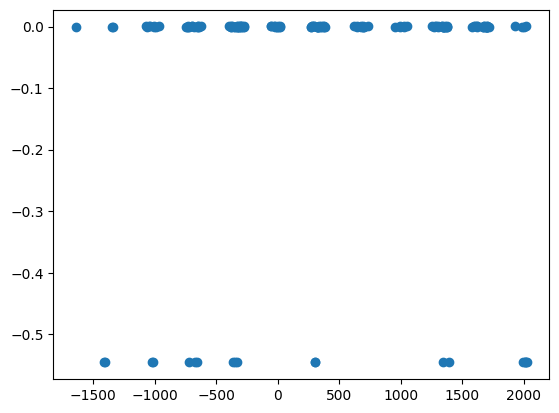

In [13]:
plt.scatter(ephemeris_obj1.timing_data.epochs, subtracted_model_times_1)

In [14]:
# prec_transit_times = generate_synthetic_precession_data(epochs, 0.0, 1.091423, 0.00310, 0.000984, 2.62, tra_or_occ=tra_or_occs)
# plt.scatter(epochs, (prec_transit_times - 0 - 1.091423 * epochs))

In [22]:
synthetic_base_url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/main/example_data/wasp12b_tra_occ.csv'
synthetic_base_data = pd.read_csv(url)
synthetic_base_tra_or_occs = np.array(data["tra_or_occ"])
synthetic_base_epochs = np.array(data["epoch"].astype('int'))
synthetic_data_1 = generate_synthetic_precession_data(synthetic_base_epochs, 2456305.45488, 1.09142, 0.0447, 0.000984, 2.62, synthetic_base_tra_or_occs)
# For the errors
occ_mask = synthetic_base_tra_or_occs == "occ"
tra_mask = synthetic_base_tra_or_occs == "tra"
mid_time_err_occ = np.array(data["sigma_transit_time"])[occ_mask]
mid_time_err_tra = np.array(data["sigma_transit_time"])[tra_mask]
synthetic_base_avg_err_occ = np.average(mid_time_err_occ)
synthetic_base_avg_err_tra = np.average(mid_time_err_tra)
synethic_base_std_err_occ = np.std(mid_time_err_occ)
synethic_base_std_err_tra = np.std(mid_time_err_tra)
synthetic_noise_1_occ = abs(np.random.normal(synthetic_base_avg_err_occ, synethic_base_std_err_occ, len(data["epoch"][occ_mask])))
synthetic_noise_1_tra = abs(np.random.normal(synthetic_base_avg_err_tra, synethic_base_std_err_tra, len(data["epoch"][tra_mask])))

In [16]:
synthetic_based_on_wasp12_b = {
    "epochs": synthetic_base_epochs,
    "mid_times": synthetic_data_1,
    "mid_time_errs": synthetic_noise_1,
    "tra_or_occ": synthetic_base_tra_or_occs
}
pd.DataFrame(synthetic_based_on_wasp12_b).to_csv("synthetic_precession_data_wasp12_b_params.csv", index=False)

In [17]:
timing_obj2 = TimingData("jd", synthetic_base_epochs, synthetic_data_1, synthetic_noise_1, synthetic_base_tra_or_occs, "tdb")
ephemeris_obj2 = Ephemeris(timing_obj2)

In [18]:
precession_model_2 = ephemeris_obj2.get_model_ephemeris("precession")

[-5.288834609018522e-05, -0.5456728816054692, -0.54562341991209, -4.351618576947658e-05, 1.9220579588363762e-05, -2.6625652026268654e-05, -5.4735869980504503e-05, -5.4161050229595276e-05, 3.470684669082402e-05, -0.5456505713884781, -0.5455662568647313, 5.410676658357261e-05, 2.978913994411414e-05, 6.763725650671404e-06, 2.374847781538847e-05, -1.3243760236036906e-05, 4.7155385459518584e-05, 4.620913580311026e-05, -1.5739510786261235e-05, -0.5455627694857412, -1.763146417488315e-05, 4.3111944705742644e-05, 4.3111944705742644e-05, -5.540034101159108e-05, -0.5455932973554809, -0.5455917742033307, 5.073666147836775e-05, -2.835215445884387e-05, -5.011073881178163e-06, 5.143326484358113e-05, -2.9091404712744406e-05, 5.267885694593133e-05, -5.409666772493438e-05, -5.450042203847261e-05, -2.8352006665954832e-05, 5.109054882268538e-05, -5.500919593259823e-05, -0.5455932977772022, -5.5400157521035e-05, 4.878498191374092e-05, -0.5456674140421001, -1.43315950822398e-05, -0.5456042972946875, -5.578

Text(0, 0.5, 'Precession Model Mid-Times (Minus Lin Params)')

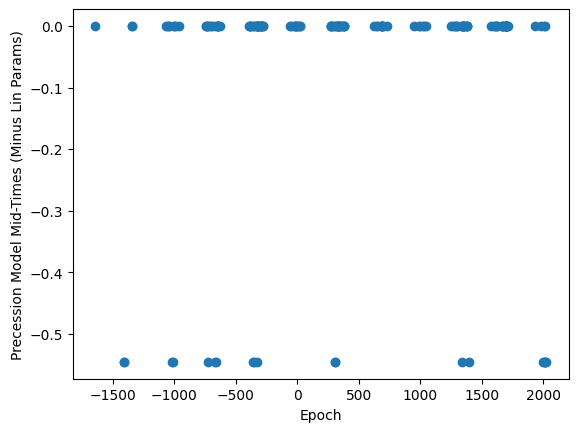

In [19]:
subtracted_model_times = ephemeris_obj2._subtract_linear_parameters(precession_model_2["model_data"], precession_model_2["conjunction_time"], precession_model_2["period"], ephemeris_obj2.timing_data.epochs)
plt.scatter(ephemeris_obj2.timing_data.epochs, subtracted_model_times)
plt.xlabel("Epoch")
plt.ylabel("Precession Model Mid-Times (Minus Lin Params)")

[-0.09566034276895152, -0.08061468014716411, -0.08064618856974448, -0.08964310972828571, -0.08955800585431462, -0.08360266925410542, -0.08347161085612242, -0.08314398488482766, -0.08296927512355978, -0.08391857220726706, -0.0839794955763864, -0.08222714979365264, -0.0822053352878811, -0.08181285858609044, -0.0813337012809825, -0.0766084002137859, -0.07652413220182552, -0.07631379814654338, -0.07629279109744402, -0.08640085925731, -0.07614588238345732, -0.07568579018288801, -0.07568579018288801, -0.07522827169225366, -0.08681735886693787, -0.08689271453067704, -0.07477347312919846, -0.0746293583829356, -0.07458823649176338, -0.07456768485940302, -0.0745265992898112, -0.0741579397656551, -0.06961675114433774, -0.06943111390114609, -0.06941260186522413, -0.06937560526739617, -0.0691544187016575, -0.08880020744862804, -0.06887986926938083, -0.06882522024636728, -0.08886188776318704, -0.06844515021242614, -0.08896643981285024, -0.06842716064852539, -0.06840918086345482, -0.06835530157854919

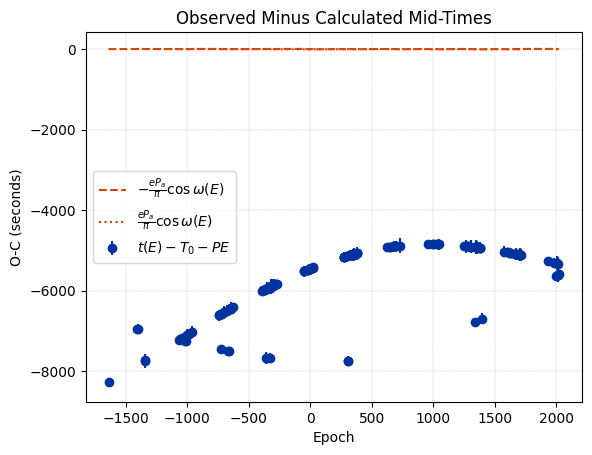

In [20]:
ephemeris_obj2.plot_oc_plot("precession")
plt.show()